<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 7 
Daniel Scanks
V00788200

### **Q1** Frequency-domain filtering

<div style='background:#F0F0F0'>  Consider a time series with a sharp jump in the middle as in the notes:
</div>

In [2]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib nbagg

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave
x=x-np.mean(x)
noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.
# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

<IPython.core.display.Javascript object>


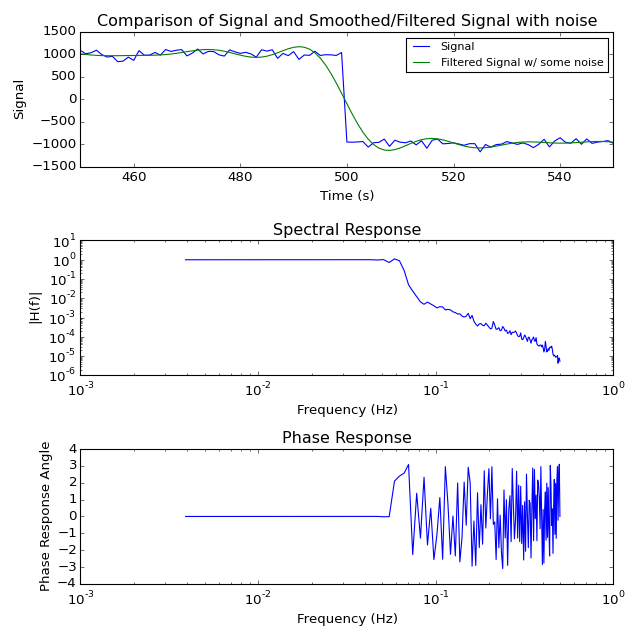

In [3]:
#1
X = np.fft.fft(xn)
fc = 0.06
ff = np.linspace(0,1,N)
X[(ff>0.06) & (ff<(1./dt-0.06))]=1.e-15
y = np.real(np.fft.ifft(X))

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(t,xn, label = 'Signal')
ax1.plot(t,y, label = 'Filtered Signal w/ some noise')
ax1.set_xlim([450,550]) #zoom 
ax1.set_ylabel(r'Signal')
ax1.set_xlabel(r'Time (s)')
ax1.set_title('Comparison of Signal and Smoothed/Filtered Signal with noise')
ax1.legend(loc = 'upper right',prop ={'size':10})



#2 
Gxnxn,f = mlab.psd(xn,Fs = 1.) #Fs = 1/dt
Gyy,f = mlab.psd(y,Fs = 1.)
Hf = np.abs(np.sqrt(Gyy/Gxnxn)) #absolute value of Hf

ax2 = fig.add_subplot(3, 1, 2)
ax2.loglog(f,Hf)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel(r'|H(f)|')
ax2.set_title('Spectral Response')

#3
Gxy,fxy = mlab.csd(xn,y, Fs = 1.) #cross spectrum
phase = np.angle(Gxy)

ax3 = fig.add_subplot(3, 1, 3)
ax3.semilogx(fxy, phase)
ax3.set_xlabel ('Frequency (Hz)')
ax3.set_ylabel('Phase Response Angle')
ax3.set_title('Phase Response')
plt.tight_layout()


Comments:
Can safely say that the filter is pretty good but not great. It does effectively work as a low pass filter, which can be seen on both the spectra response and phase graphs. The response and phase are both smooth (good unity) up until approx 0.058Hz where the graphs become erradic (filtering out noise above the mentioned frequency level). The step is smoothed out but there is an wanted peak before it and an unwanted trough after it.

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

<IPython.core.display.Javascript object>


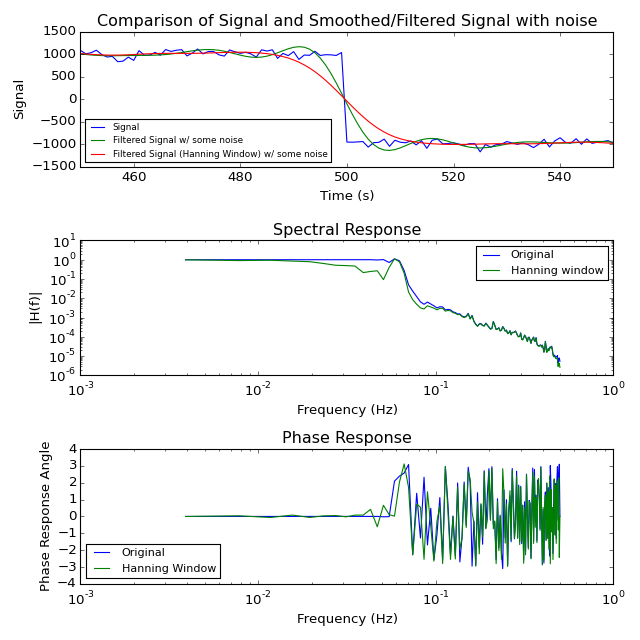

In [4]:
hanningw = np.hanning(int(len(ff)*0.06*2))
X = np.fft.fft(xn)
X[(ff>0.06) & (ff<(1./dt-0.06))]=1.e-15
X[:0.06*len(ff)] = X[:0.06*len(ff)]*hanningw[0.06*len(ff):] #applied to start
X[-0.06*len(ff):] = X[-0.06*len(ff):]*hanningw[:0.06*len(ff)] #applied to end
yhan = np.real(np.fft.ifft(X))


Gyhan, f = mlab.psd(yhan, Fs = 1.)
Gxnyhan, fxny = mlab.csd(xn, yhan, Fs = 1.)
Hfhan= np.abs(np.sqrt(Gyhan/Gxnxn))
phasehan = np.angle(Gxnyhan)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(t,xn, label = 'Signal')
ax1.plot(t,y, label = 'Filtered Signal w/ some noise')
ax1.plot(t,yhan, label = 'Filtered Signal (Hanning Window) w/ some noise')
ax1.set_xlim([450,550]) #zoom 
ax1.set_ylabel(r'Signal')
ax1.set_xlabel(r'Time (s)')
ax1.set_title('Comparison of Signal and Smoothed/Filtered Signal with noise')
ax1.legend(loc = 'lower left',prop ={'size':8})

ax2 = fig.add_subplot(3, 1, 2)
ax2.loglog(f,Hf, label = 'Original')
ax2.loglog(f,Hfhan, label = 'Hanning window')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel(r'|H(f)|')
ax2.set_title('Spectral Response')
ax2.legend(loc = 'upper right',prop ={'size':10})

ax3 = fig.add_subplot(3, 1, 3)
ax3.semilogx(fxy, phase, label = 'Original')
ax3.semilogx(fxny, phasehan, label = 'Hanning Window')
ax3.set_xlabel ('Frequency (Hz)')
ax3.set_ylabel('Phase Response Angle')
ax3.set_title('Phase Response')
ax3.legend(loc = 'lower left',prop ={'size':10})
plt.tight_layout()




Comments: 
The spectral response with the hanning window application seems to show unity for less range than the previous filter. This is because the hanning windowed filter eliminates even more higher freqency noise, further specifying what low frequencies are allowed to pass.The signal step has been smoothed out quite a bit more than the previous filter application. 

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

<IPython.core.display.Javascript object>


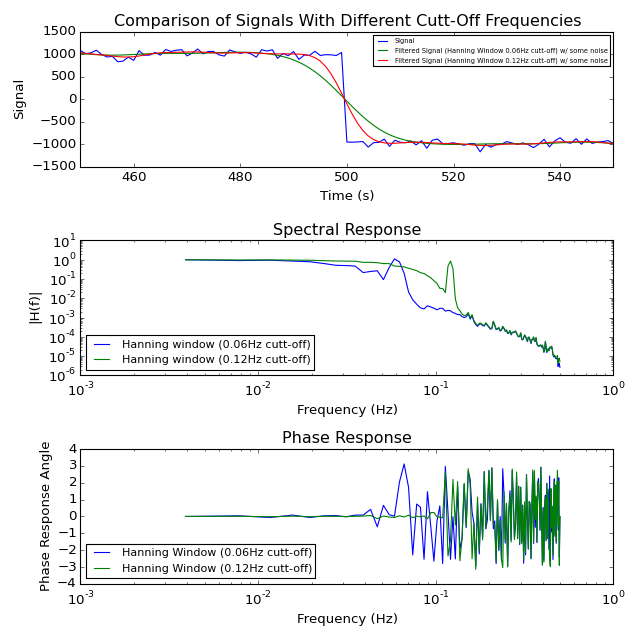

In [7]:
hanning2 = np.hanning(int(len(ff)*0.12*2)) #trying different cuttoff freq.
X = np.fft.fft(xn)
X[(ff>0.12) & (ff<(1./dt-0.12))]=1.e-15
X[:0.12*len(ff)] = X[:0.12*len(ff)]*hanning2[0.12*len(ff):] #applied to start
X[-0.12*len(ff):] = X[-0.12*len(ff):]*hanning2[:0.12*len(ff)] #applied to end
yhan2 = np.real(np.fft.ifft(X))


Gyhan2, f2 = mlab.psd(yhan2, Fs = 1.)
Gxnyhan2, fxny2 = mlab.csd(xn, yhan2, Fs = 1.)
Hfhan2= np.abs(np.sqrt(Gyhan2/Gxnxn))
phasehan2 = np.angle(Gxnyhan2)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(t,xn, label = 'Signal')
ax1.plot(t,yhan, label = 'Filtered Signal (Hanning Window 0.06Hz cutt-off) w/ some noise')
ax1.plot(t,yhan2, label = 'Filtered Signal (Hanning Window 0.12Hz cutt-off) w/ some noise')
ax1.set_xlim([450,550]) #zoom 
ax1.set_ylabel(r'Signal')
ax1.set_xlabel(r'Time (s)')
ax1.set_title('Comparison of Signals With Different Cutt-Off Frequencies')
ax1.legend(loc = 'upper right',prop ={'size':6})

ax2 = fig.add_subplot(3, 1, 2)
ax2.loglog(f,Hfhan, label = 'Hanning window (0.06Hz cutt-off)')
ax2.loglog(f2,Hfhan2, label = 'Hanning window (0.12Hz cutt-off)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel(r'|H(f)|')
ax2.set_title('Spectral Response')
ax2.legend(loc = 'lower left',prop ={'size':10})

ax3 = fig.add_subplot(3, 1, 3)
ax3.semilogx(fxny, phasehan, label = 'Hanning Window (0.06Hz cutt-off)')
ax3.semilogx(fxny2, phasehan2, label = 'Hanning Window (0.12Hz cutt-off)')
ax3.set_xlabel ('Frequency (Hz)')
ax3.set_ylabel('Phase Response Angle')
ax3.set_title('Phase Response')
ax3.legend(loc = 'lower left',prop ={'size':10})
plt.tight_layout()

Coments:
Pros- The frequency we want preserved is preserved (0.03Hz) and frequencies below that are well resolved.
Cons- Higher frequencies are filtered out and the step is once again more steep, and therefore more defined in the signal.

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

<IPython.core.display.Javascript object>


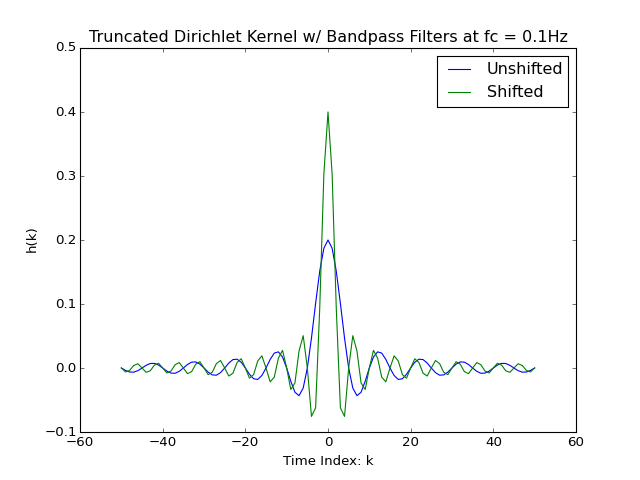

In [17]:
#1
N=20000
t = np.arange(N*1.)
x = np.cumsum(np.random.randn(N)) #red noise
x=x-np.mean(x)
dt = 1.
fc = 0.1 #0.1/fs
fs=1.

#ho = M/N when k=0, and the function is continous 
M = fc*2*N+1
mc = 0.1*N
k = np.array(range(-N/2+1,N/2))
m = k*1.
h = (1./N)*np.sin(np.pi*(k+0.000001)*M/N)/np.sin(np.pi*(k+0.000001)/N)
filter =  50
h = h[abs(k)<filter+1]
k = k[abs(k)<filter+1]
H = np.fft.fftshift(np.fft.fft(h))
hshift = 2*h*np.cos(2*np.pi*(k)*mc/N)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(k, h, label='Unshifted')
ax.plot(k, hshift, label='Shifted')
ax.set_xlabel('Time Index: k')
ax.set_ylabel('h(k)')
ax.set_title('Truncated Dirichlet Kernel w/ Bandpass Filters at fc = 0.1Hz')
ax.legend()

<IPython.core.display.Javascript object>


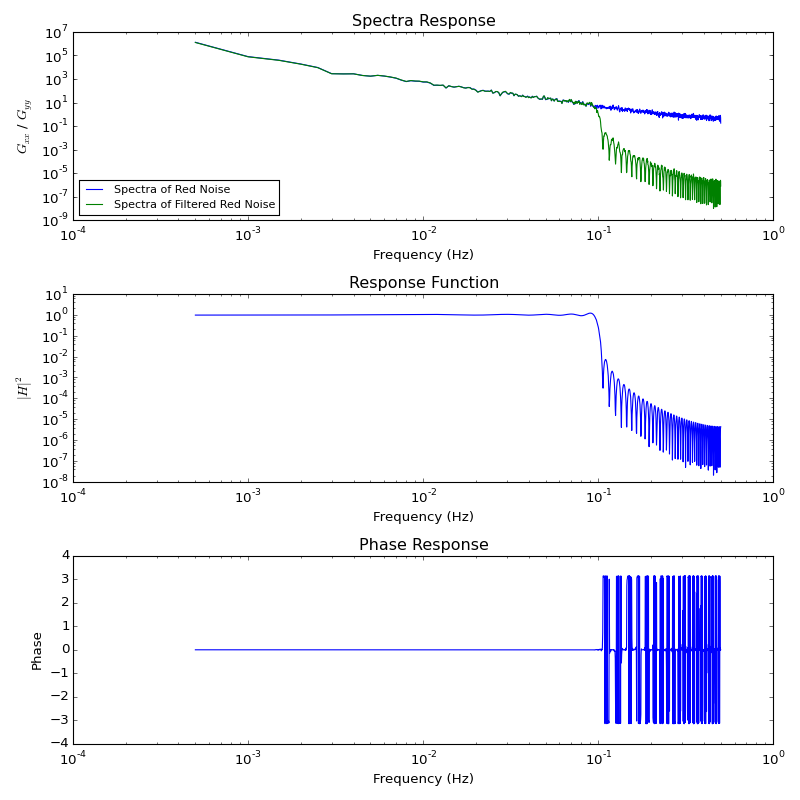

In [16]:
#2
y = np.convolve(x, h, mode = 'same')
nfft = N/10 
ovrlp = N/20
Gxx, f = mlab.psd(x, Fs=1., NFFT = nfft, noverlap = ovrlp) #psd's and csd
Gyy, f = mlab.psd(y, Fs=1., NFFT = nfft, noverlap = ovrlp)
Gxy, fxy = mlab.csd(x, y, Fs=1., NFFT = nfft)
phase = np.angle(Gxy)
Hsquared = Gyy/Gxx
#plotting
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(3, 1, 1)
ax1.loglog(f, Gxx, label='Spectra of Red Noise')
ax1.loglog(f, Gyy, label='Spectra of Filtered Red Noise')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$G_{xx}$ / $G_{yy}$')
ax1.set_title('Spectra Response')
ax1.legend(loc = 'lower left',prop ={'size':10})

ax2 = fig.add_subplot(3, 1, 2)
ax2.loglog(f, Hsquared)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$|H|^{2}$')
ax2.set_title('Response Function')

ax3 = fig.add_subplot(3, 1, 3)
ax3.semilogx(fxy, phase)
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Phase')
ax3.set_title('Phase Response')
plt.tight_layout()

Comments:
Can see that at >0.1Hz the response function drops off, thereby showing that the bandpass fileter has worked and is filtering out frequencies above 0.1Hz. The unity before this frequency shows that everything below and incuding 0.1Hz is allowed to pass. The phase graph and spectral responses both show dramatic changes after 0.1Hz as well.

## Q3: Bandpass the weather data

In [21]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]

dc=minutedata[np.isfinite(minutedata)]
import scipy.signal as signal

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

<IPython.core.display.Javascript object>


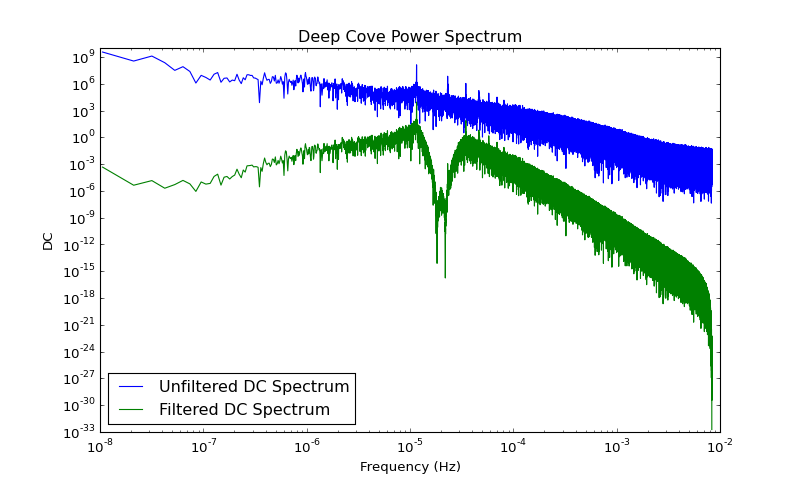

In [24]:

#high pass filter (4 hr period)

dt = 60. #
fsample = 1./dt
fnyq = fsample/2.
th1 = 8.  #times in hours
th2 = 12.
fph = 1./(th1*60.)
fsh = 1./(th2*60.)
nh,fnh=signal.ellipord(fph*2., fsh*2.,0.5, 20.)
bh,ah=signal.ellip(nh, 0.5, 20., fnh, btype='highpass')
yh = signal.filtfilt(bh, ah, dc)

#low pass filter (24 hour period)

tl1 = 24.
tl2 =36.
fpl = 1./(tl1*60.)
fsl = 1./(tl2*60.)
nl,fnl=signal.ellipord(fpl*2., fsl*2.,0.5, 20.)
bl,al=signal.ellip(nl, 0.5, 20., fnl, btype ='lowpass')
yl = signal.filtfilt(bl,al,yh)

#unfiltered
Gunfilt, funf = mlab.psd(dc, NFFT = len(dc), Fs = 1./dt)
#filtered
Gfilt, ffilt = mlab.psd(yl-np.mean(yl), NFFT = len(dc), Fs = 1./dt)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(funf, Gunfilt, label='Unfiltered DC Spectrum')
ax.loglog(ffilt, Gfilt, label= "Filtered DC Spectrum")
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('DC')
ax.set_title('Deep Cove Power Spectrum')
ax.legend(loc = 'lower left')

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

<IPython.core.display.Javascript object>


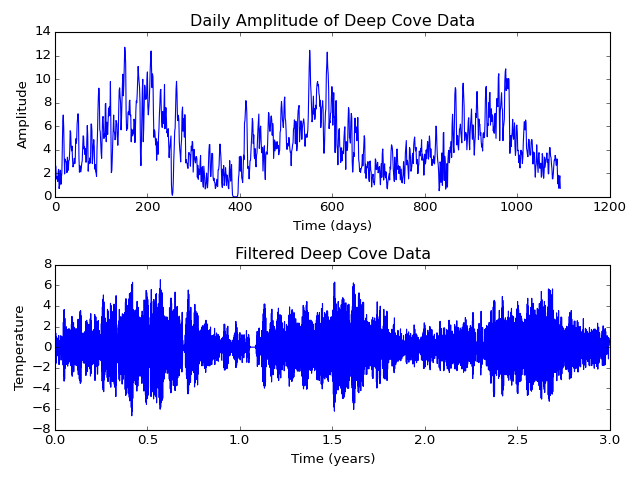

In [31]:
N = len(yl)/(60.*24.) #covert to days
a = 0
b = 1
ydaily = np.zeros(N+1)
tdaily = np.arange(0,N,1)
for i in range (0, int(N+1), 1):
    low = a
    high = 60*24*b
    rangeyl = yl[low:high]
    maxyl = np.max(rangeyl)
    minyl = np.min(rangeyl)
    ampyl = maxyl-minyl
    ydaily[i] = ampyl
    a = a+60*24
    b= b+1

    
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(tdaily, ydaily*100, label= 'Filtered Deep Cove Data')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Daily Amplitude of Deep Cove Data')
ax1.legend

tyearly = np.arange(0, len(dc)/(60.*24.*365.), 1/(60.*24.*365.))
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(tyearly, yl*100)
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Temperature')
ax2.set_title('Filtered Deep Cove Data')
plt.tight_layout()








Comments:
The fluctuations seem to be higher during the summer months as the days can be very hot in comparison to the night, wheras the winter is well regulated by the ocean and the temperature does not change quite as much.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()